## Imports

In [218]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [219]:
from pylamp.neural.layers import Linear
from pylamp.optim.optimizer import SGD
from pylamp.loss.losses import MSELoss, BCELoss
from pylamp.utils.data import DataGenerator as dg 

## Training on Regression task

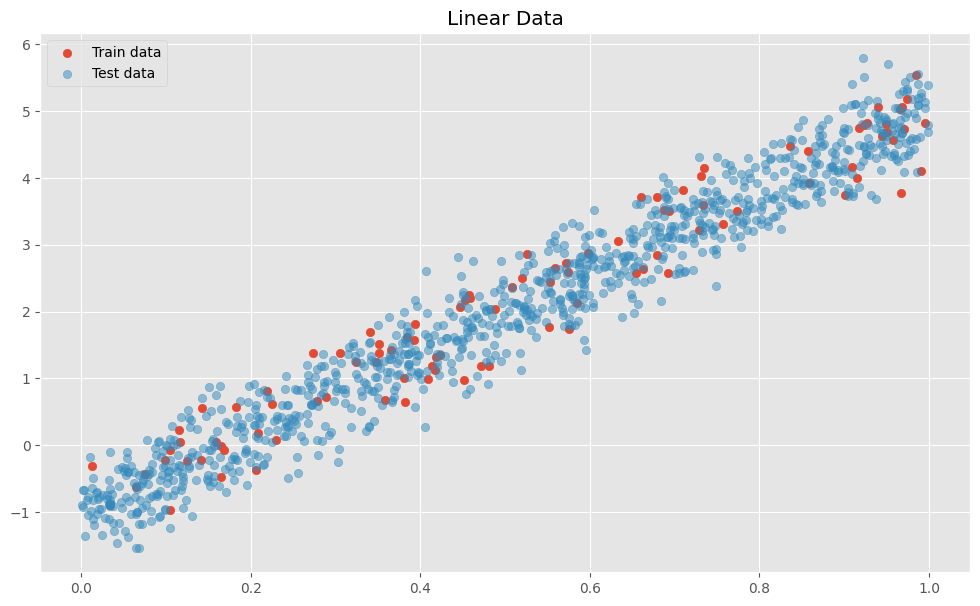

In [220]:
X_train, X_test,y_train,y_test  = dg.generate_linear_data()
dg.plot_linear_data(X_train, y_train, X_test, y_test, title='Linear Data', alpha_train=1, alpha_test=0.5)

In [221]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
print(f'input_size: {input_size}, output_size: {output_size}')
model = Linear(input_size, output_size, use_bias=True)
loss = MSELoss()
train_loss, val_loss = SGD.step(
    model, loss, X_train=X_train, y_train=y_train, 
    epochs=100, lr=1e-2, batch_size=10, verbose=True,
)

input_size: 1, output_size: 1
Epoch 0 : Train loss : 13.994617044852665 - Val loss : None
Epoch 10 : Train loss : 1.6343611526496282 - Val loss : None
Epoch 20 : Train loss : 1.2819359696928134 - Val loss : None
Epoch 30 : Train loss : 1.0302271971431305 - Val loss : None
Epoch 40 : Train loss : 0.8344023006221171 - Val loss : None
Epoch 50 : Train loss : 0.6832519944306875 - Val loss : None
Epoch 60 : Train loss : 0.5666709948179307 - Val loss : None
Epoch 70 : Train loss : 0.4767575342363787 - Val loss : None
Epoch 80 : Train loss : 0.40741084995393206 - Val loss : None
Epoch 90 : Train loss : 0.35392564212175326 - Val loss : None
Model updated 1000 times.


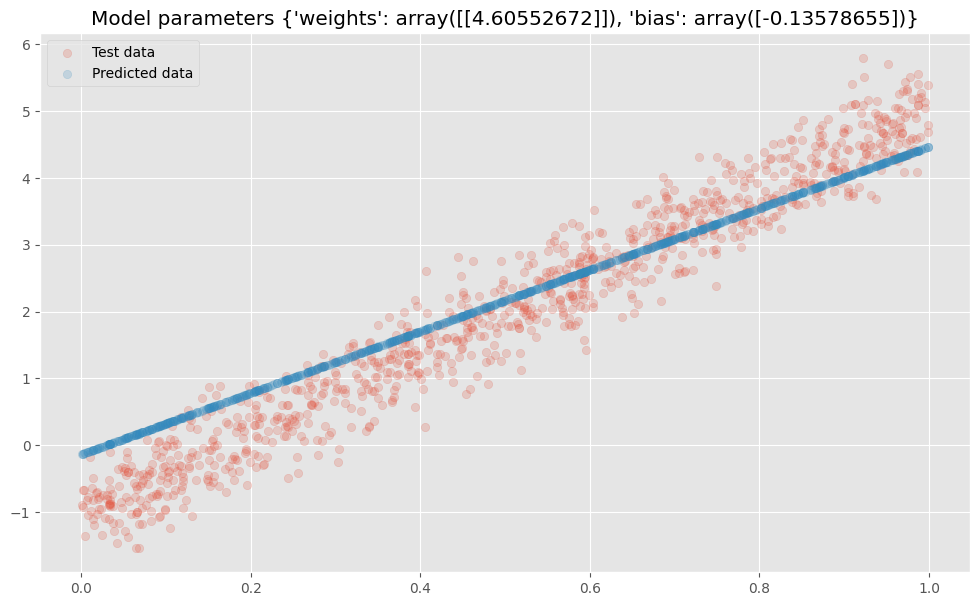

In [222]:
output = model.forward(X_test.reshape(-1,1))
title = f"Model parameters {model._parameters}"
dg.plot_linear_data(X_test, y_test, X_test, output, title_train="Test data",title_test="Predicted data", title=title)

## Traning on Classification Task

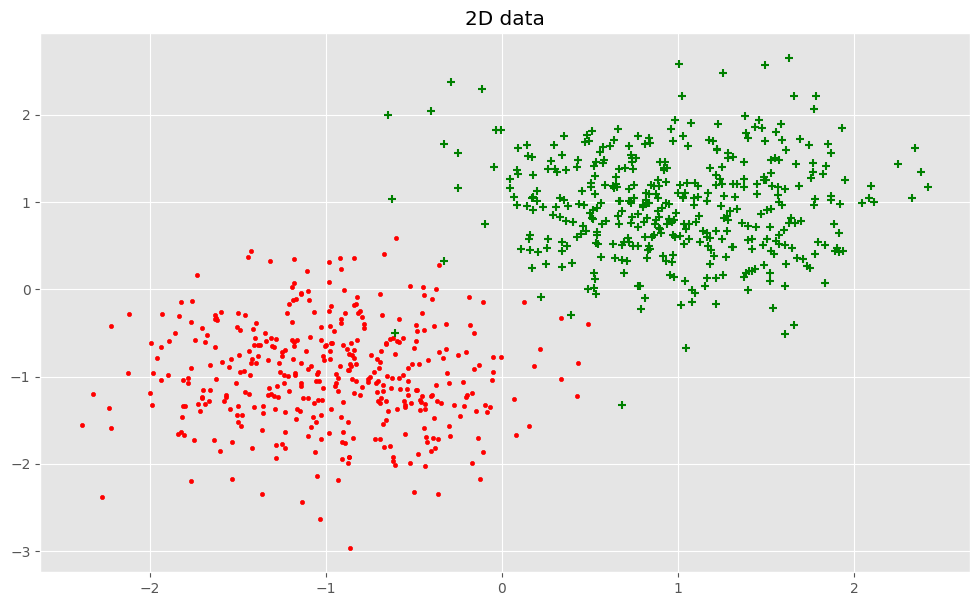

In [238]:
X_train, X_test, y_train, y_test  = dg.generate_2D_data(data_type=0, epsilon=0.5)
dg.plot_2D_data(X_train, y_train)

## Model, loss and optimizer

In [239]:
input_size = X_train.shape[1]
output_size = y_train.shape[1]
print(f'input_size: {input_size}, output_size: {output_size}')
model = Linear(input_size, output_size, use_bias=True)
loss = BCELoss()
train_loss, val_loss = SGD.step(
    model, loss, X_train=X_train, y_train=y_train, 
    epochs=100, lr=1e-3, batch_size=10, verbose=True,
)

input_size: 2, output_size: 1
Epoch 0 : Train loss : -84.27461440358204 - Val loss : None
Epoch 10 : Train loss : -83.81409738498323 - Val loss : None
Epoch 20 : Train loss : -83.81409738498323 - Val loss : None
Epoch 30 : Train loss : -83.81409738498323 - Val loss : None
Epoch 40 : Train loss : -83.81409738498323 - Val loss : None
Epoch 50 : Train loss : -83.81409738498323 - Val loss : None
Epoch 60 : Train loss : -83.81409738498323 - Val loss : None
Epoch 70 : Train loss : -83.81409738498323 - Val loss : None
Epoch 80 : Train loss : -83.81409738498323 - Val loss : None
Epoch 90 : Train loss : -83.81409738498323 - Val loss : None
Model updated 8000 times.


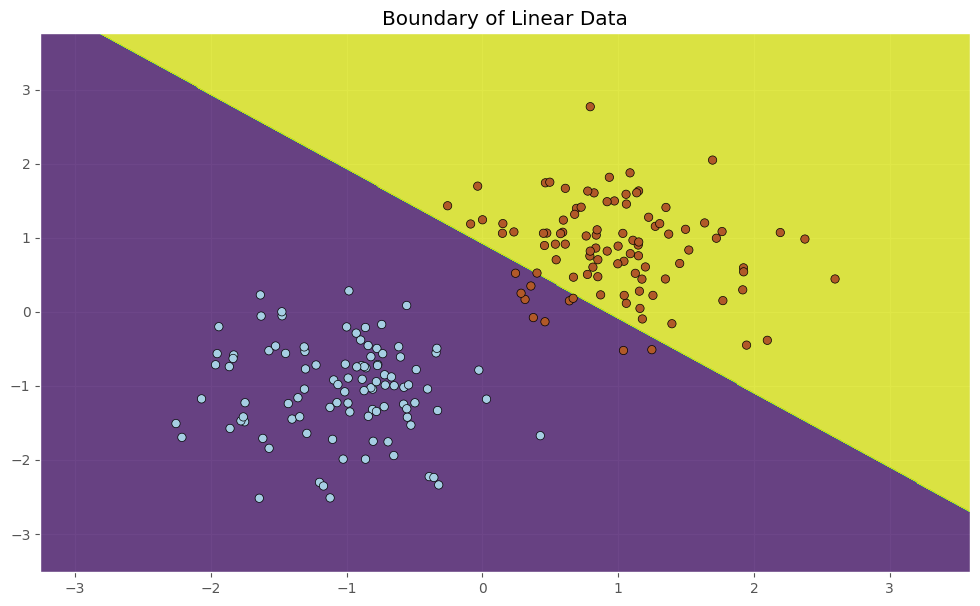

In [240]:
dg.plot_decision_boundary(X_test, y_test, model, "Boundary of Linear Data")